# Neural Network Trading Strategy

In [1]:
# Importing packages
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import pandas_datareader
import datetime
import pandas_datareader.data as web

# Don't show warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Creating a dataframe of time series S&P500 data
start = datetime.datetime(2017, 1, 1)
end = datetime.datetime(2020, 1, 1)
dataset = web.DataReader("^GSPC", 'yahoo', start, end)
dataset = dataset.dropna()
dataset.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,3226.429932,3220.510010,3225.449951,3223.379883,1296540000,3223.379883
2019-12-26,3240.080078,3227.199951,3227.199951,3239.909912,2160680000,3239.909912
2019-12-27,3247.929932,3234.370117,3247.229980,3240.020020,2428670000,3240.020020
2019-12-30,3240.919922,3216.570068,3240.090088,3221.290039,3013290000,3221.290039
2019-12-31,3231.719971,3212.030029,3215.179932,3230.780029,2893810000,3230.780029


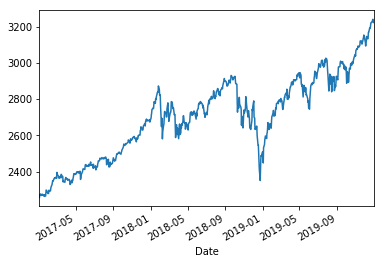

In [3]:
dataset['Adj Close'].plot()

In [4]:
# Feature generation
dataset['H-L'] = dataset['High'] - dataset['Low']
dataset['O-C'] = dataset['Close'] - dataset['Open']
dataset['3day MA'] = dataset['Close'].shift(1).rolling(window = 3).mean()
dataset['10day MA'] = dataset['Close'].shift(1).rolling(window = 10).mean()
dataset['30day MA'] = dataset['Close'].shift(1).rolling(window = 30).mean()
dataset['Std_dev']= dataset['Close'].rolling(5).std()
dataset['Return'] =  100*(dataset['Adj Close'] - dataset['Adj Close'].shift(1))/dataset['Adj Close'].shift(1)
dataset.head()

,High,Low,Open,Close,Volume,Adj Close,H-L,O-C,3day MA,10day MA,30day MA,Std_dev,Return
Date,,,,,,,,,,,,,
2017-01-03,2263.879883,2245.129883,2251.570068,2257.830078,3770530000,2257.830078,18.750000,6.260010,NaN,NaN,NaN,NaN,NaN
2017-01-04,2272.820068,2261.600098,2261.600098,2270.750000,3764890000,2270.750000,11.219971,9.149902,NaN,NaN,NaN,NaN,0.572227
2017-01-05,2271.500000,2260.449951,2268.179932,2269.000000,3761820000,2269.000000,11.050049,0.820068,NaN,NaN,NaN,NaN,-0.077067
2017-01-06,2282.100098,2264.060059,2271.139893,2276.979980,3339890000,2276.979980,18.040039,5.840088,2265.860026,NaN,NaN,NaN,0.351696
2017-01-09,2275.489990,2268.899902,2273.590088,2268.899902,3217610000,2268.899902,6.590088,-4.690186,2272.243327,NaN,NaN,6.910959,-0.354859


In [5]:
# Creating feature and target variables
dataset = dataset.drop('Adj Close', axis=1)
dataset = dataset.fillna(0)
dataset = dataset[dataset.index > '2018-01-01']
X = dataset.drop('Return', axis=1)
y = dataset['Return']

In [6]:
# Creating train and test sets
split = int(len(dataset)*0.8)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [7]:
X_test

,High,Low,Open,Close,Volume,H-L,O-C,3day MA,10day MA,30day MA,Std_dev
Date,,,,,,,,,,,
2019-08-08,2938.719971,2894.469971,2896.209961,2938.090088,4106370000,44.250000,41.880127,2870.163330,2954.015991,2973.035335,38.876934
2019-08-09,2935.750000,2900.149902,2930.510010,2918.649902,3350640000,35.600098,-11.860107,2901.280029,2947.458008,2973.845671,36.147409
2019-08-12,2907.580078,2873.139893,2907.070068,2882.699951,2851630000,34.440186,-24.370117,2913.573324,2936.736987,2973.636670,25.891849
2019-08-13,2943.310059,2877.050049,2880.719971,2926.320068,3853600000,66.260010,45.600098,2913.146647,2922.909985,2971.668001,25.261329
2019-08-14,2894.149902,2839.639893,2894.149902,2840.600098,4312530000,54.510010,-53.549805,2909.223307,2914.223999,2970.401001,39.720805
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,3226.429932,3220.510010,3225.449951,3223.379883,1296540000,5.919922,-2.070068,3216.866699,3183.722998,3139.320321,14.427463
2019-12-26,3240.080078,3227.199951,3227.199951,3239.909912,2160680000,12.880127,12.709961,3222.869954,3192.808984,3143.865983,12.256063
2019-12-27,3247.929932,3234.370117,3247.229980,3240.020020,2428670000,13.559814,-7.209961,3229.099935,3202.636987,3148.801644,9.420398


In [8]:
# Feature scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(sc.transform(X_test), columns = X_test.columns)

In [9]:
# Importing packages for the neural network
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [10]:
# Creating a very basic neural network
classifier = Sequential()
classifier.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu', input_dim = X.shape[1]))
classifier.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [11]:
# Training the network
classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])
classifier.fit(X_train, y_train, batch_size = 10, epochs = 75)

Epoch 1/75
41/41 [==============================] - 0s 1ms/step - loss: 1.0988 - accuracy: 0.0000e+00
Epoch 2/75
41/41 [==============================] - 0s 1ms/step - loss: 0.8677 - accuracy: 0.0000e+00
Epoch 3/75
41/41 [==============================] - 0s 1ms/step - loss: 0.7569 - accuracy: 0.0000e+00
Epoch 4/75
41/41 [==============================] - 0s 1ms/step - loss: 0.7064 - accuracy: 0.0000e+00
Epoch 5/75
41/41 [==============================] - 0s 1ms/step - loss: 0.6919 - accuracy: 0.0000e+00
Epoch 6/75
41/41 [==============================] - 0s 1ms/step - loss: 0.6876 - accuracy: 0.0000e+00
Epoch 7/75
41/41 [==============================] - 0s 1ms/step - loss: 0.6867 - accuracy: 0.0000e+00
Epoch 8/75
41/41 [==============================] - 0s 1ms/step - loss: 0.6954 - accuracy: 0.0000e+00
Epoch 9/75
41/41 [==============================] - 0s 1ms/step - loss: 0.6827 - accuracy: 0.0000e+00
Epoch 10/75
41/41 [==============================] - 0s 1ms/step - loss: 0.6798 - 

In [12]:
# Predicting output for the test set
y_pred = classifier.predict(X_test)

In [13]:
# Turning our prediction into a a position.
# The threshold can be optimised using ML but for brevity I'll overlook this
def num_to_pol(num, thresh=0.2):
    num = float(num)
    if num >= thresh:
        num=1
    elif num < -thresh:
        num=-1
    else:
        num=0
    
    return num

In [14]:
y_pred = [x for x in y_pred]

In [15]:
trade_dataset = pd.DataFrame(X_test)
trade_dataset['Return'] = y_test

In [16]:
# Creating a class for the strategy

class nnstrat(object):
    
    def __init__(self,ticker,start,end,thresh=0.05):
        #setting the attributes 
        self.ticker=ticker #array of prices
        self.thresh=thresh #
        self.start=start #the beginning of test period as a string
        self.end=end    # the end of test period as a string
    
            
    def generate_signals(self):
        
            
            dataset = web.DataReader(self.ticker, 'yahoo', self.start, self.end)
            dataset = dataset.dropna()
            
            # Feature generation
            dataset['H-L'] = dataset['High'] - dataset['Low']
            dataset['O-C'] = dataset['Adj Close'] - dataset['Open']
            dataset['3day MA'] = dataset['Adj Close'].shift(1).rolling(window = 3).mean()
            dataset['10day MA'] = dataset['Adj Close'].shift(1).rolling(window = 10).mean()
            dataset['30day MA'] = dataset['Adj Close'].shift(1).rolling(window = 30).mean()
            dataset['Std_dev']= dataset['Adj Close'].rolling(5).std()
            dataset['Return'] =  100*(dataset['Adj Close'] - dataset['Adj Close'].shift(1))/dataset['Adj Close'].shift(1)
            dataset = dataset.dropna()
            
            X = dataset.drop('Return', axis=1)
            y = dataset['Return']
            
            # Creating train and test sets
            split = int(len(dataset)*0.8)
            X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]
            
            # Feature scaling 
            from sklearn.preprocessing import StandardScaler
            sc = StandardScaler()
            X_train = pd.DataFrame(sc.fit_transform(X_train), columns = X_train.columns)
            X_test = pd.DataFrame(sc.transform(X_test), columns = X_test.columns)


            # Importing packages for the neural network
            from keras.models import Sequential
            from keras.layers import Dense
            from keras.layers import Dropout
            
            # Creating a very basic neural network
            classifier = Sequential()
            classifier.add(Dense(units = 128, kernel_initializer = 'uniform',
                                 activation = 'relu', input_dim = X.shape[1]))
            classifier.add(Dense(units = 128, kernel_initializer = 'uniform', 
                                 activation = 'relu'))
            classifier.add(Dense(units = 1, kernel_initializer = 'uniform', 
                                 activation = 'sigmoid'))
            
            # Training the network
            classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])
            classifier.fit(X_train, y_train, batch_size = 10, epochs = 75)
            
            # Predicting output for the test set
            y_pred = classifier.predict(X_test)
            
            y_pred = map(num_to_pol, list(y_pred), self.thresh*np.ones(len(y_pred)))
            
            y_pred = [x for x in y_pred]
            y_pred = pd.DataFrame(y_pred)
            
            self.trade_dataset = X_test
            
            #Creating Buy and Sell Signals
            self.trade_dataset['Longs']=pd.DataFrame(y_pred==1)*1.0
            self.trade_dataset['Shorts']=pd.DataFrame(y_pred==-1)*1.0 
            self.trade_dataset['Adj Close'] = X_test['Adj Close']
            
            #Calculating cash in each step
            self.trade_dataset['Pos_Change'] = self.trade_dataset['Longs'] - self.trade_dataset['Shorts']
            self.trade_dataset['Cash_Change'] = -1.0*self.trade_dataset['Pos_Change']*self.trade_dataset['Adj Close']
            self.trade_dataset['Cash'] = np.cumsum(self.trade_dataset['Cash_Change'])
            
            #tracking positions and calculating total
            self.trade_dataset['Net_Position'] = np.cumsum(self.trade_dataset['Longs'] - self.trade_dataset['Shorts'])
            self.trade_dataset['Position_Value'] = self.trade_dataset['Net_Position']*self.trade_dataset['Adj Close']
            self.trade_dataset['Total'] = self.trade_dataset['Position_Value'] + self.trade_dataset['Cash']
    
    def create_returns(self):
            
            with plt.style.context(['ggplot','seaborn-paper']):
                #Plotting trade_dataset Value   
                plt.plot(self.trade_dataset['Total'])
                #plt.plot(self.trade_dataset['Initial Value'])
                plt.title('Strategy Returns')
                plt.legend(loc=0)
                plt.show()

In [17]:
strat = nnstrat(start = datetime.datetime(2017, 1, 1),
               end = datetime.datetime(2020, 1, 1),
               ticker = '^GSPC')

In [18]:
strat.generate_signals()

Epoch 1/75
58/58 [==============================] - 0s 1ms/step - loss: 0.7628 - accuracy: 0.0000e+00
Epoch 2/75
58/58 [==============================] - 0s 1ms/step - loss: 0.5885 - accuracy: 0.0000e+00
Epoch 3/75
58/58 [==============================] - 0s 1ms/step - loss: 0.5286 - accuracy: 0.0000e+00
Epoch 4/75
58/58 [==============================] - 0s 1ms/step - loss: 0.4972 - accuracy: 0.0000e+00
Epoch 5/75
58/58 [==============================] - 0s 1ms/step - loss: 0.4895 - accuracy: 0.0000e+00
Epoch 6/75
58/58 [==============================] - 0s 1ms/step - loss: 0.4952 - accuracy: 0.0000e+00
Epoch 7/75
58/58 [==============================] - 0s 1ms/step - loss: 0.4876 - accuracy: 0.0000e+00
Epoch 8/75
58/58 [==============================] - 0s 1ms/step - loss: 0.4849 - accuracy: 0.0000e+00
Epoch 9/75
58/58 [==============================] - 0s 1ms/step - loss: 0.4836 - accuracy: 0.0000e+00
Epoch 10/75
58/58 [==============================] - 0s 994us/step - loss: 0.4870 

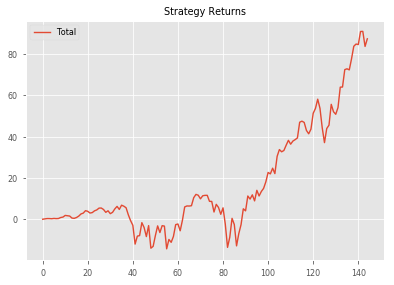

In [19]:
strat.create_returns()